In [1]:
#import libraries
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
#open King County House Data with pandas

kc_housing = pd.read_csv('kc_house_data.csv')

#data size: 21597 rows x 21 columns

In [3]:
#drop Nan values

kc_housing = kc_housing.dropna()

# data size: 15762 rows x 21 columns

In [4]:
#drop columns id and date because we want to focus on how the features of the house affect sale price 

kc_housing = kc_housing.drop(columns = ['id', 'date'])

#data size: 15762 rows x 19 columns

In [5]:
#check data type
kc_housing.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#convert sqft_basement to float 
kc_housing['sqft_basement'] = kc_housing[kc_housing.sqft_basement != "?"]  
kc_housing['sqft_basement'] = kc_housing[kc_housing.sqft_basement != "NaN"]
kc_housing['sqft_basement'] = kc_housing['sqft_basement'].astype(float)    

In [7]:
#check data type

kc_housing.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

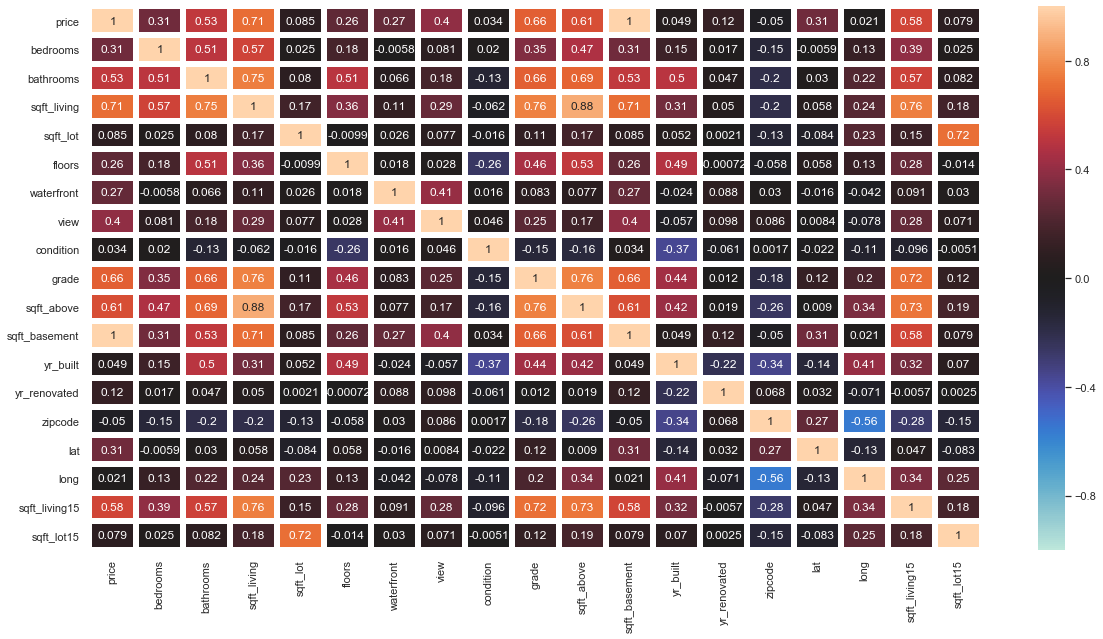

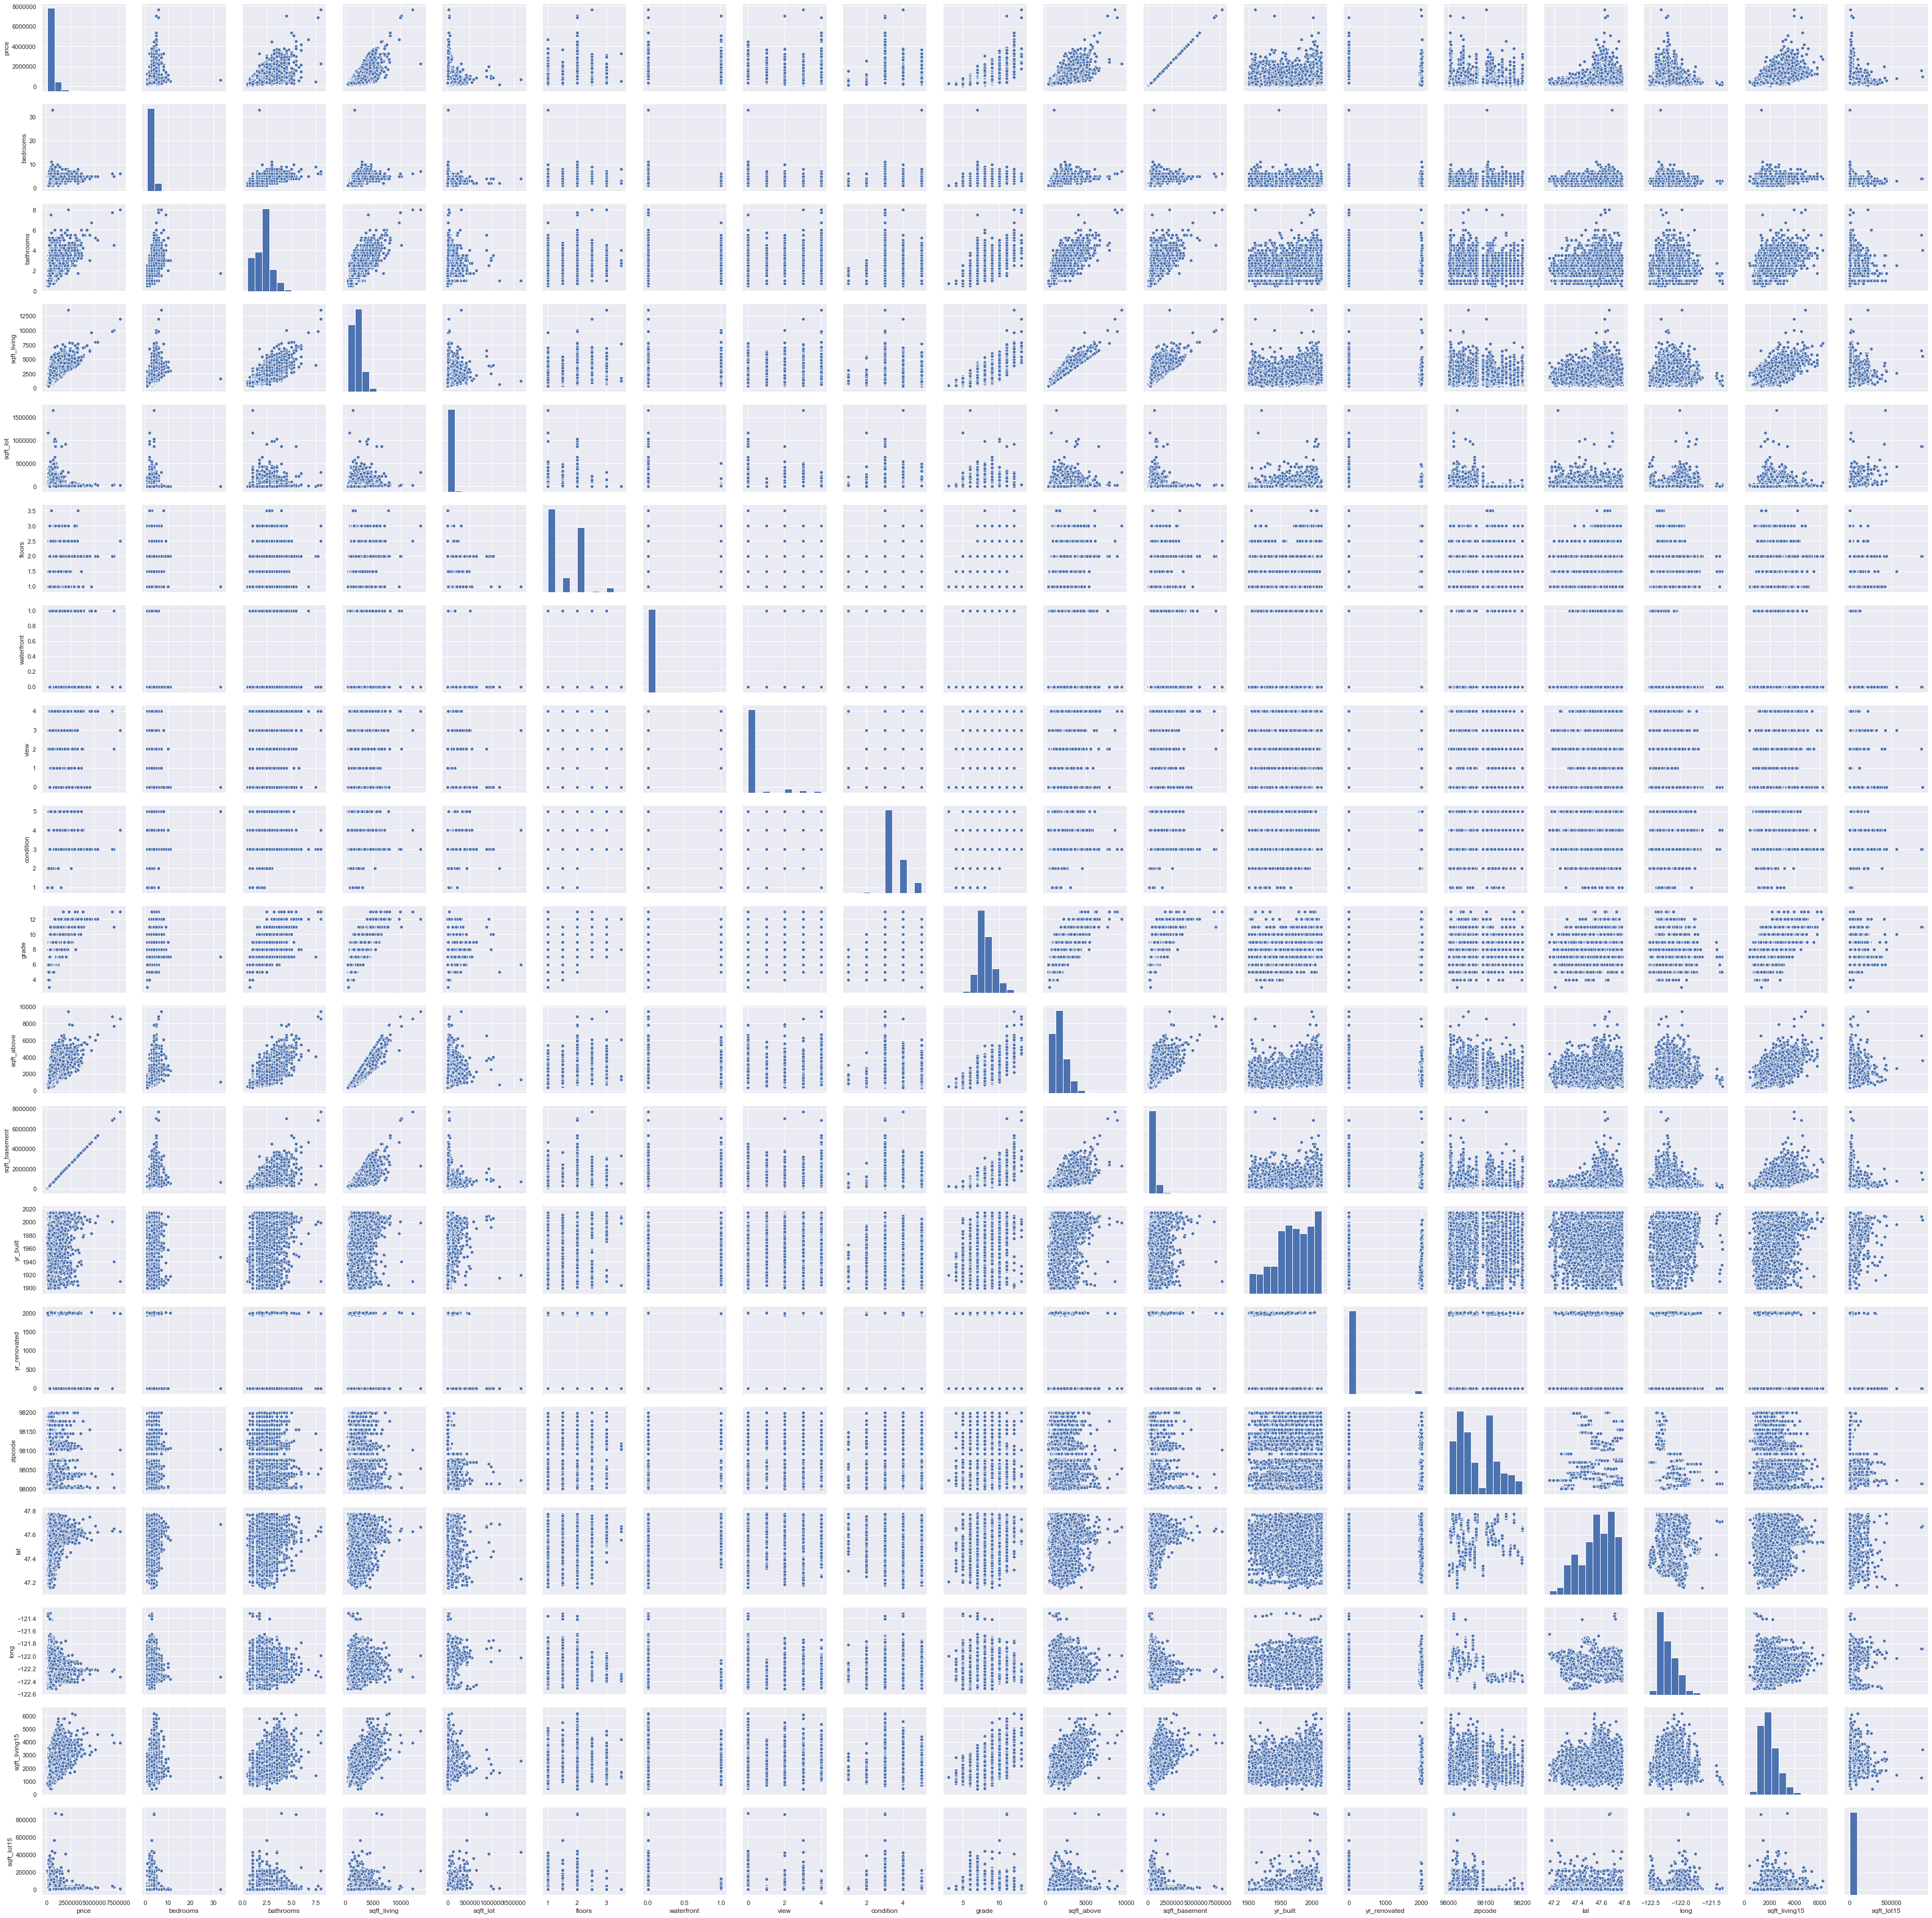

In [8]:
kc_housing_corr = kc_housing.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(kc_housing_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.pairplot(kc_housing)
plt.show()

In [9]:
#check descending correlation with price
corr = kc_housing.corr()
print(corr['price'].sort_values(ascending=False))

price            1.000000
sqft_basement    1.000000
sqft_living      0.706189
grade            0.664146
sqft_above       0.612014
sqft_living15    0.581572
bathrooms        0.526155
view             0.396862
lat              0.306607
bedrooms         0.305489
waterfront       0.274212
floors           0.259505
yr_renovated     0.122731
sqft_lot         0.084504
sqft_lot15       0.079402
yr_built         0.049345
condition        0.034367
long             0.021215
zipcode         -0.049502
Name: price, dtype: float64


In [10]:
#we noticed that sqft_basement and price are identical (r=1).  
kc_housing.sort_values(by=['sqft_basement'], ascending = False)
# sqft_basement is inaccurate because it should not be in the millions

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
7245   7700000.0         6       8.00        12050     27600     2.5   
3910   7060000.0         5       4.50        10040     37325     2.0   
9245   6890000.0         6       7.75         9890     31374     2.0   
1446   5350000.0         5       5.00         8000     23985     2.0   
1162   5110000.0         5       5.25         8010     45517     2.0   
...          ...       ...        ...          ...       ...     ...   
16700    85000.0         2       1.00          910      9753     1.0   
3763     84000.0         2       1.00          700     20130     1.0   
18453    83000.0         2       1.00          900      8580     1.0   
2139     82500.0         2       1.00          520     22334     1.0   
8267     82000.0         3       1.00          860     10426     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
7245          0.0   3.0          4     13        8570      7700000.0   
3910          1.0   2.0          3     11        7680      7060000.0   
9245          0.0   4.0          3     13        8860      6890000.0   
1446          0.0   4.0          3     12        6720      5350000.0   
1162          1.0   4.0          3     12        5990      5110000.0   
...           ...   ...        ...    ...         ...            ...   
16700         0.0   0.0          3      5         910        85000.0   
3763          0.0   0.0          3      6         700        84000.0   
18453         0.0   0.0          3      5         900        83000.0   
2139          0.0   0.0          2      5         520        82500.0   
8267          0.0   0.0          3      6         860        82000.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
7245       1910        1987.0    98102  47.6298 -122.323           3940   
3910       1940        2001.0    98004  47.6500 -122.214           3930   
9245       2001           0.0    98039  47.6305 -122.240           4540   
1446       2009           0.0    98004  47.6232 -122.220           4600   
1162       1999           0.0    98033  47.6767 -122.211           3430   
...         ...           ...      ...      ...      ...            ...   
16700      1947           0.0    98032  47.3897 -122.236           1160   
3763       1949           0.0    98168  47.4752 -122.271           1490   
18453      1918           0.0    98168  47.4727 -122.270           2060   
2139       1951           0.0    98168  47.4799 -122.296           1572   
8267       1954           0.0    98146  47.4987 -122.341           1140   

       sqft_lot15  
7245         8800  
3910        25449  
9245        42730  
1446        21750  
1162        26788  
...           ...  
16700        7405  
3763        18630  
18453        6533  
2139        10570  
8267        11250  

[15762 rows x 19 columns]

In [11]:
#remove sqft_basement from our dataset
kc_housing = kc_housing.drop(columns = 'sqft_basement')

In [12]:
#check descending correlation with price
corr = kc_housing.corr()
print(corr['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.706189
grade            0.664146
sqft_above       0.612014
sqft_living15    0.581572
bathrooms        0.526155
view             0.396862
lat              0.306607
bedrooms         0.305489
waterfront       0.274212
floors           0.259505
yr_renovated     0.122731
sqft_lot         0.084504
sqft_lot15       0.079402
yr_built         0.049345
condition        0.034367
long             0.021215
zipcode         -0.049502
Name: price, dtype: float64


We decide to make 2 regression plots: sqft_living vs price, grade vs price<br/>
We want to know how a unit increase in sqft_living and grade will increase house price<br/>
We will also create a bar graph for grade vs mean price for each grade<br/>

count      15762.000000
mean      541317.175739
std       372225.838727
min        82000.000000
25%       321000.000000
50%       450000.000000
75%       644875.000000
max      7700000.000000
Name: price, dtype: object


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Price')]

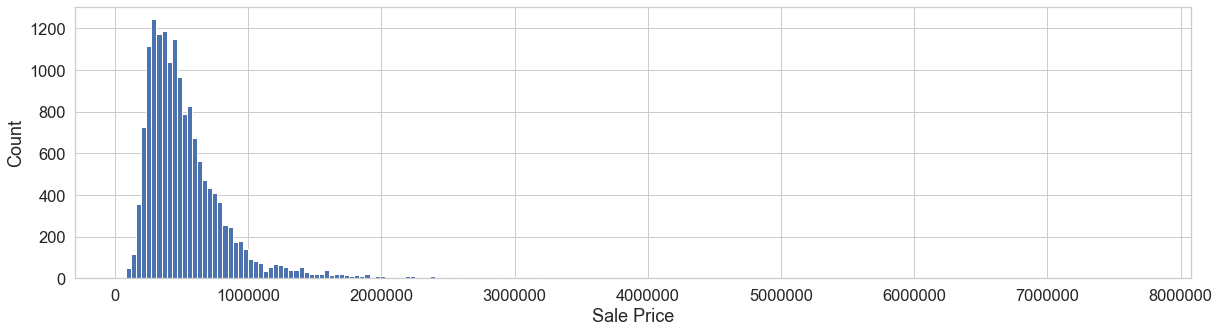

In [13]:
#review the distribution of price 
print(kc_housing["price"].describe().apply(lambda x: format(x, 'f')))
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')

#distribution is skewed to the right

(array([  16.,   26.,   54.,  146.,  395.,  838., 1544., 1939., 2013.,
        2184., 2118., 1586., 1241.,  668.,  353.,  267.,  153.,   88.,
          67.,   33.,   20.,    5.,    5.,    0.,    3.]),
 array([11.31447453, 11.49616478, 11.67785504, 11.85954529, 12.04123554,
        12.2229258 , 12.40461605, 12.58630631, 12.76799656, 12.94968682,
        13.13137707, 13.31306732, 13.49475758, 13.67644783, 13.85813809,
        14.03982834, 14.2215186 , 14.40320885, 14.58489911, 14.76658936,
        14.94827961, 15.12996987, 15.31166012, 15.49335038, 15.67504063,
        15.85673089]),
 <a list of 25 Patch objects>)

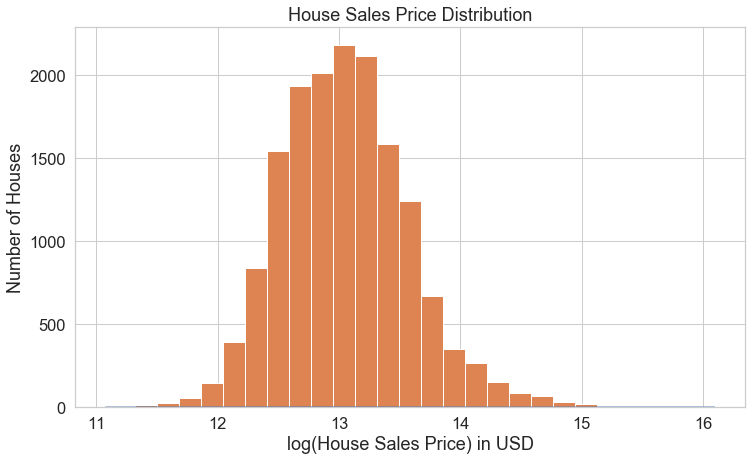

In [14]:
# normalize price data by taking the log of the price

plt.figure(figsize=(12,7))
sns.distplot(np.log(kc_housing.price), bins = 25)
plt.xlabel("log(House Sales Price) in USD")
plt.ylabel("Number of Houses")
plt.title("House Sales Price Distribution")
plt.hist(np.log(kc_housing.price), bins = 25)

In [15]:
#convert price column to log(price)
kc_housing['price'] = np.log(kc_housing.price)

In [16]:
print(kc_housing["price"].describe().apply(lambda x: format(x, 'f')))

count    15762.000000
mean        13.049552
std          0.526265
min         11.314475
25%         12.679196
50%         13.017003
75%         13.376812
max         15.856731
Name: price, dtype: object


In [17]:
kc_housing.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.341634   0.551221     0.698297  0.095583  0.314746   
bedrooms       0.341634  1.000000   0.512243     0.573575  0.025460  0.180485   
bathrooms      0.551221  0.512243   1.000000     0.753846  0.080362  0.505187   
sqft_living    0.698297  0.573575   0.753846     1.000000  0.165336  0.359407   
sqft_lot       0.095583  0.025460   0.080362     0.165336  1.000000 -0.009924   
floors         0.314746  0.180485   0.505187     0.359407 -0.009924  1.000000   
waterfront     0.178335 -0.005833   0.065688     0.111491  0.025982  0.018382   
view           0.347364  0.080577   0.180923     0.285506  0.077073  0.027518   
condition      0.034761  0.020074  -0.130287    -0.062319 -0.016036 -0.261013   
grade          0.703114  0.354243   0.664748     0.764251  0.108950  0.459843   
sqft_above     0.607198  0.474272   0.685677     0.876176  0.174216  0.529101   
yr_built       0.077629  0.153229   0.504841     0.314220  0.051578  0.487052   
yr_renovated   0.112335  0.017430   0.046988     0.050232  0.002147 -0.000720   
zipcode       -0.034844 -0.147255  -0.199625    -0.196537 -0.129494 -0.058130   
lat            0.452642 -0.005917   0.029930     0.058394 -0.084304  0.058190   
long           0.053112  0.129370   0.222755     0.239521  0.231638  0.129769   
sqft_living15  0.618808  0.390720   0.569290     0.756676  0.145393  0.281982   
sqft_lot15     0.089665  0.025217   0.081984     0.176820  0.718489 -0.013571   

               waterfront      view  condition     grade  sqft_above  \
price            0.178335  0.347364   0.034761  0.703114    0.607198   
bedrooms        -0.005833  0.080577   0.020074  0.354243    0.474272   
bathrooms        0.065688  0.180923  -0.130287  0.664748    0.685677   
sqft_living      0.111491  0.285506  -0.062319  0.764251    0.876176   
sqft_lot         0.025982  0.077073  -0.016036  0.108950    0.174216   
floors           0.018382  0.027518  -0.261013  0.459843    0.529101   
waterfront       1.000000  0.409773   0.016454  0.083034    0.077165   
view             0.409773  1.000000   0.046354  0.248679    0.170726   
condition        0.016454  0.046354   1.000000 -0.147810   -0.157958   
grade            0.083034  0.248679  -0.147810  1.000000    0.758289   
sqft_above       0.077165  0.170726  -0.157958  0.758289    1.000000   
yr_built        -0.024068 -0.056645  -0.366938  0.443286    0.418850   
yr_renovated     0.087800  0.098386  -0.060845  0.011795    0.018888   
zipcode          0.030391  0.086479   0.001685 -0.184120   -0.257359   
lat             -0.015935  0.008403  -0.022250  0.117425    0.009045   
long            -0.042324 -0.078500  -0.105823  0.200680    0.342034   
sqft_living15    0.090588  0.277778  -0.096336  0.717031    0.732636   
sqft_lot15       0.029636  0.071496  -0.005139  0.116671    0.185505   

               yr_built  yr_renovated   zipcode       lat      long  \
price          0.077629      0.112335 -0.034844  0.452642  0.053112   
bedrooms       0.153229      0.017430 -0.147255 -0.005917  0.129370   
bathrooms      0.504841      0.046988 -0.199625  0.029930  0.222755   
sqft_living    0.314220      0.050232 -0.196537  0.058394  0.239521   
sqft_lot       0.051578      0.002147 -0.129494 -0.084304  0.231638   
floors         0.487052     -0.000720 -0.058130  0.058190  0.129769   
waterfront    -0.024068      0.087800  0.030391 -0.015935 -0.042324   
view          -0.056645      0.098386  0.086479  0.008403 -0.078500   
condition     -0.366938     -0.060845  0.001685 -0.022250 -0.105823   
grade          0.443286      0.011795 -0.184120  0.117425  0.200680   
sqft_above     0.418850      0.018888 -0.257359  0.009045  0.342034   
yr_built       1.000000     -0.223541 -0.344252 -0.144089  0.408623   
yr_renovated  -0.223541      1.000000  0.068396  0.032126 -0.070677   
zipcode       -0.344252      0.068396  1.000000  0.267763 -0.562154   
lat           -0.144089      0.032126  0.267

In [20]:
kc_housing.head()


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
1  13.195614         3       2.25         2570      7242     2.0         0.0   
3  13.311329         4       3.00         1960      5000     1.0         0.0   
4  13.142166         3       2.00         1680      8080     1.0         0.0   
5  14.022525         4       4.50         5420    101930     1.0         0.0   
6  12.458775         3       2.25         1715      6819     2.0         0.0   

   view  condition  grade  sqft_above  yr_built  yr_renovated  zipcode  \
1   0.0          3      7        2170      1951        1991.0    98125   
3   0.0          5      7        1050      1965           0.0    98136   
4   0.0          3      8        1680      1987           0.0    98074   
5   0.0          3     11        3890      2001           0.0    98053   
6   0.0          3      7        1715      1995           0.0    98003   

       lat     long  sqft_living15  sqft_lot15  
1  47.7210 -122.319           1690        7639  
3  47.5208 -122.393           1360        5000  
4  47.6168 -122.045           1800        7503  
5  47.6561 -122.005           4760      101930  
6  47.3097 -122.327           2238        6819

In [21]:
# use statsmodel to assess multivariables 
# Define variables:
X = kc_housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view','condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].values
y = kc_housing['price'].values

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted = model.fit()


multiple_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     3130.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:37:35   Log-Likelihood:                -606.00
No. Observations:               15762   AIC:                             1248.
Df Residuals:                   15744   BIC:                             1386.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2021      4.299     -1.675      0.094     -15.629       1.225
x1            -0.0122      0.003     -4.435      0.000      -0.018      -0.007
x2             0.0703      0.005     14.713      0.000       0.061       0.080
x3             0.0002   6.39e-06     23.680      0.000       0.000       0.000
x4           4.48e-07   6.95e-08      6.449      0.000    3.12e-07    5.84e-07
x5             0.0734      0.005     13.909      0.000       0.063       0.084
x6             0.3776      0.025     14.867      0.000       0.328       0.427
x7             0.0618      0.003     19.580      0.000       0.056       0.068
x8             0.0623      0.003     18.110      0.000       0.056       0.069
x9             0.1568      0.003     49.364      0.000       0.151       0.163
x10        -1.267e-05   6.35e-06     -1.995      0.046   -2.51e-05    -2.2e-07
x11           -0.0034      0.000    -31.877      0.000      -0.004      -0.003
x12         3.899e-05    5.4e-06      7.223      0.000    2.84e-05    4.96e-05
x13           -0.0006   4.83e-05    -12.662      0.000      -0.001      -0.001
x14            1.4047      0.016     89.527      0.000       1.374       1.435
x15           -0.1469      0.019     -7.634      0.000      -0.185      -0.109
x16         9.656e-05   5.08e-06     19.012      0.000    8.66e-05       0.000
x17        -2.301e-07   1.05e-07     -2.200      0.028   -4.35e-07   -2.51e-08
==============================================================================
Omnibus:                      282.141   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.874
Skew:                          -0.042   Prob(JB):                    8.93e-126
Kurtosis:                       3.933   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

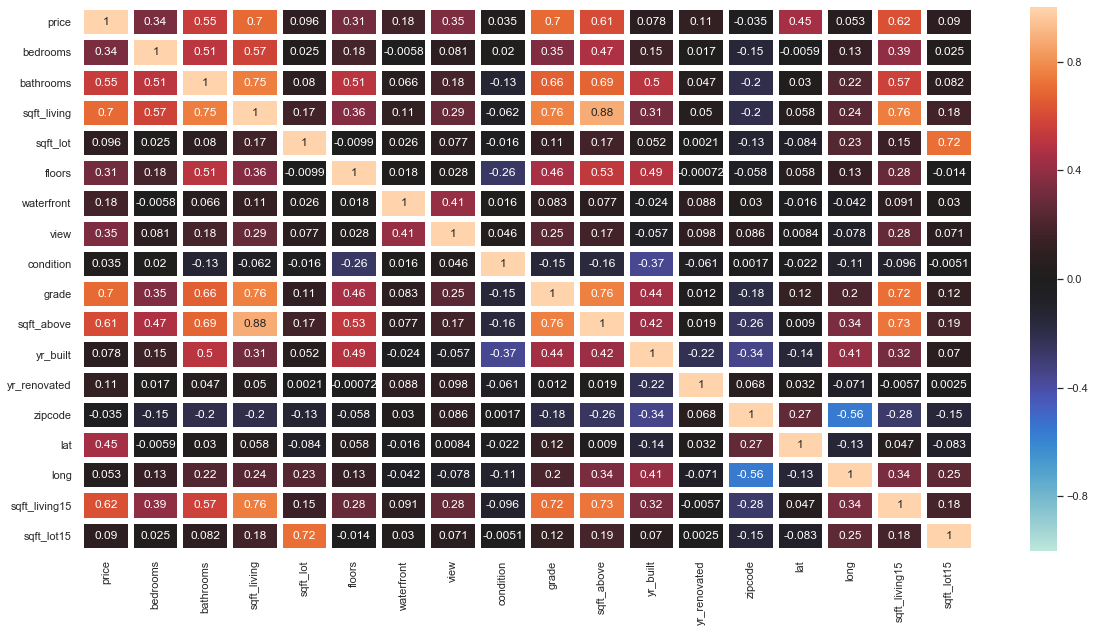

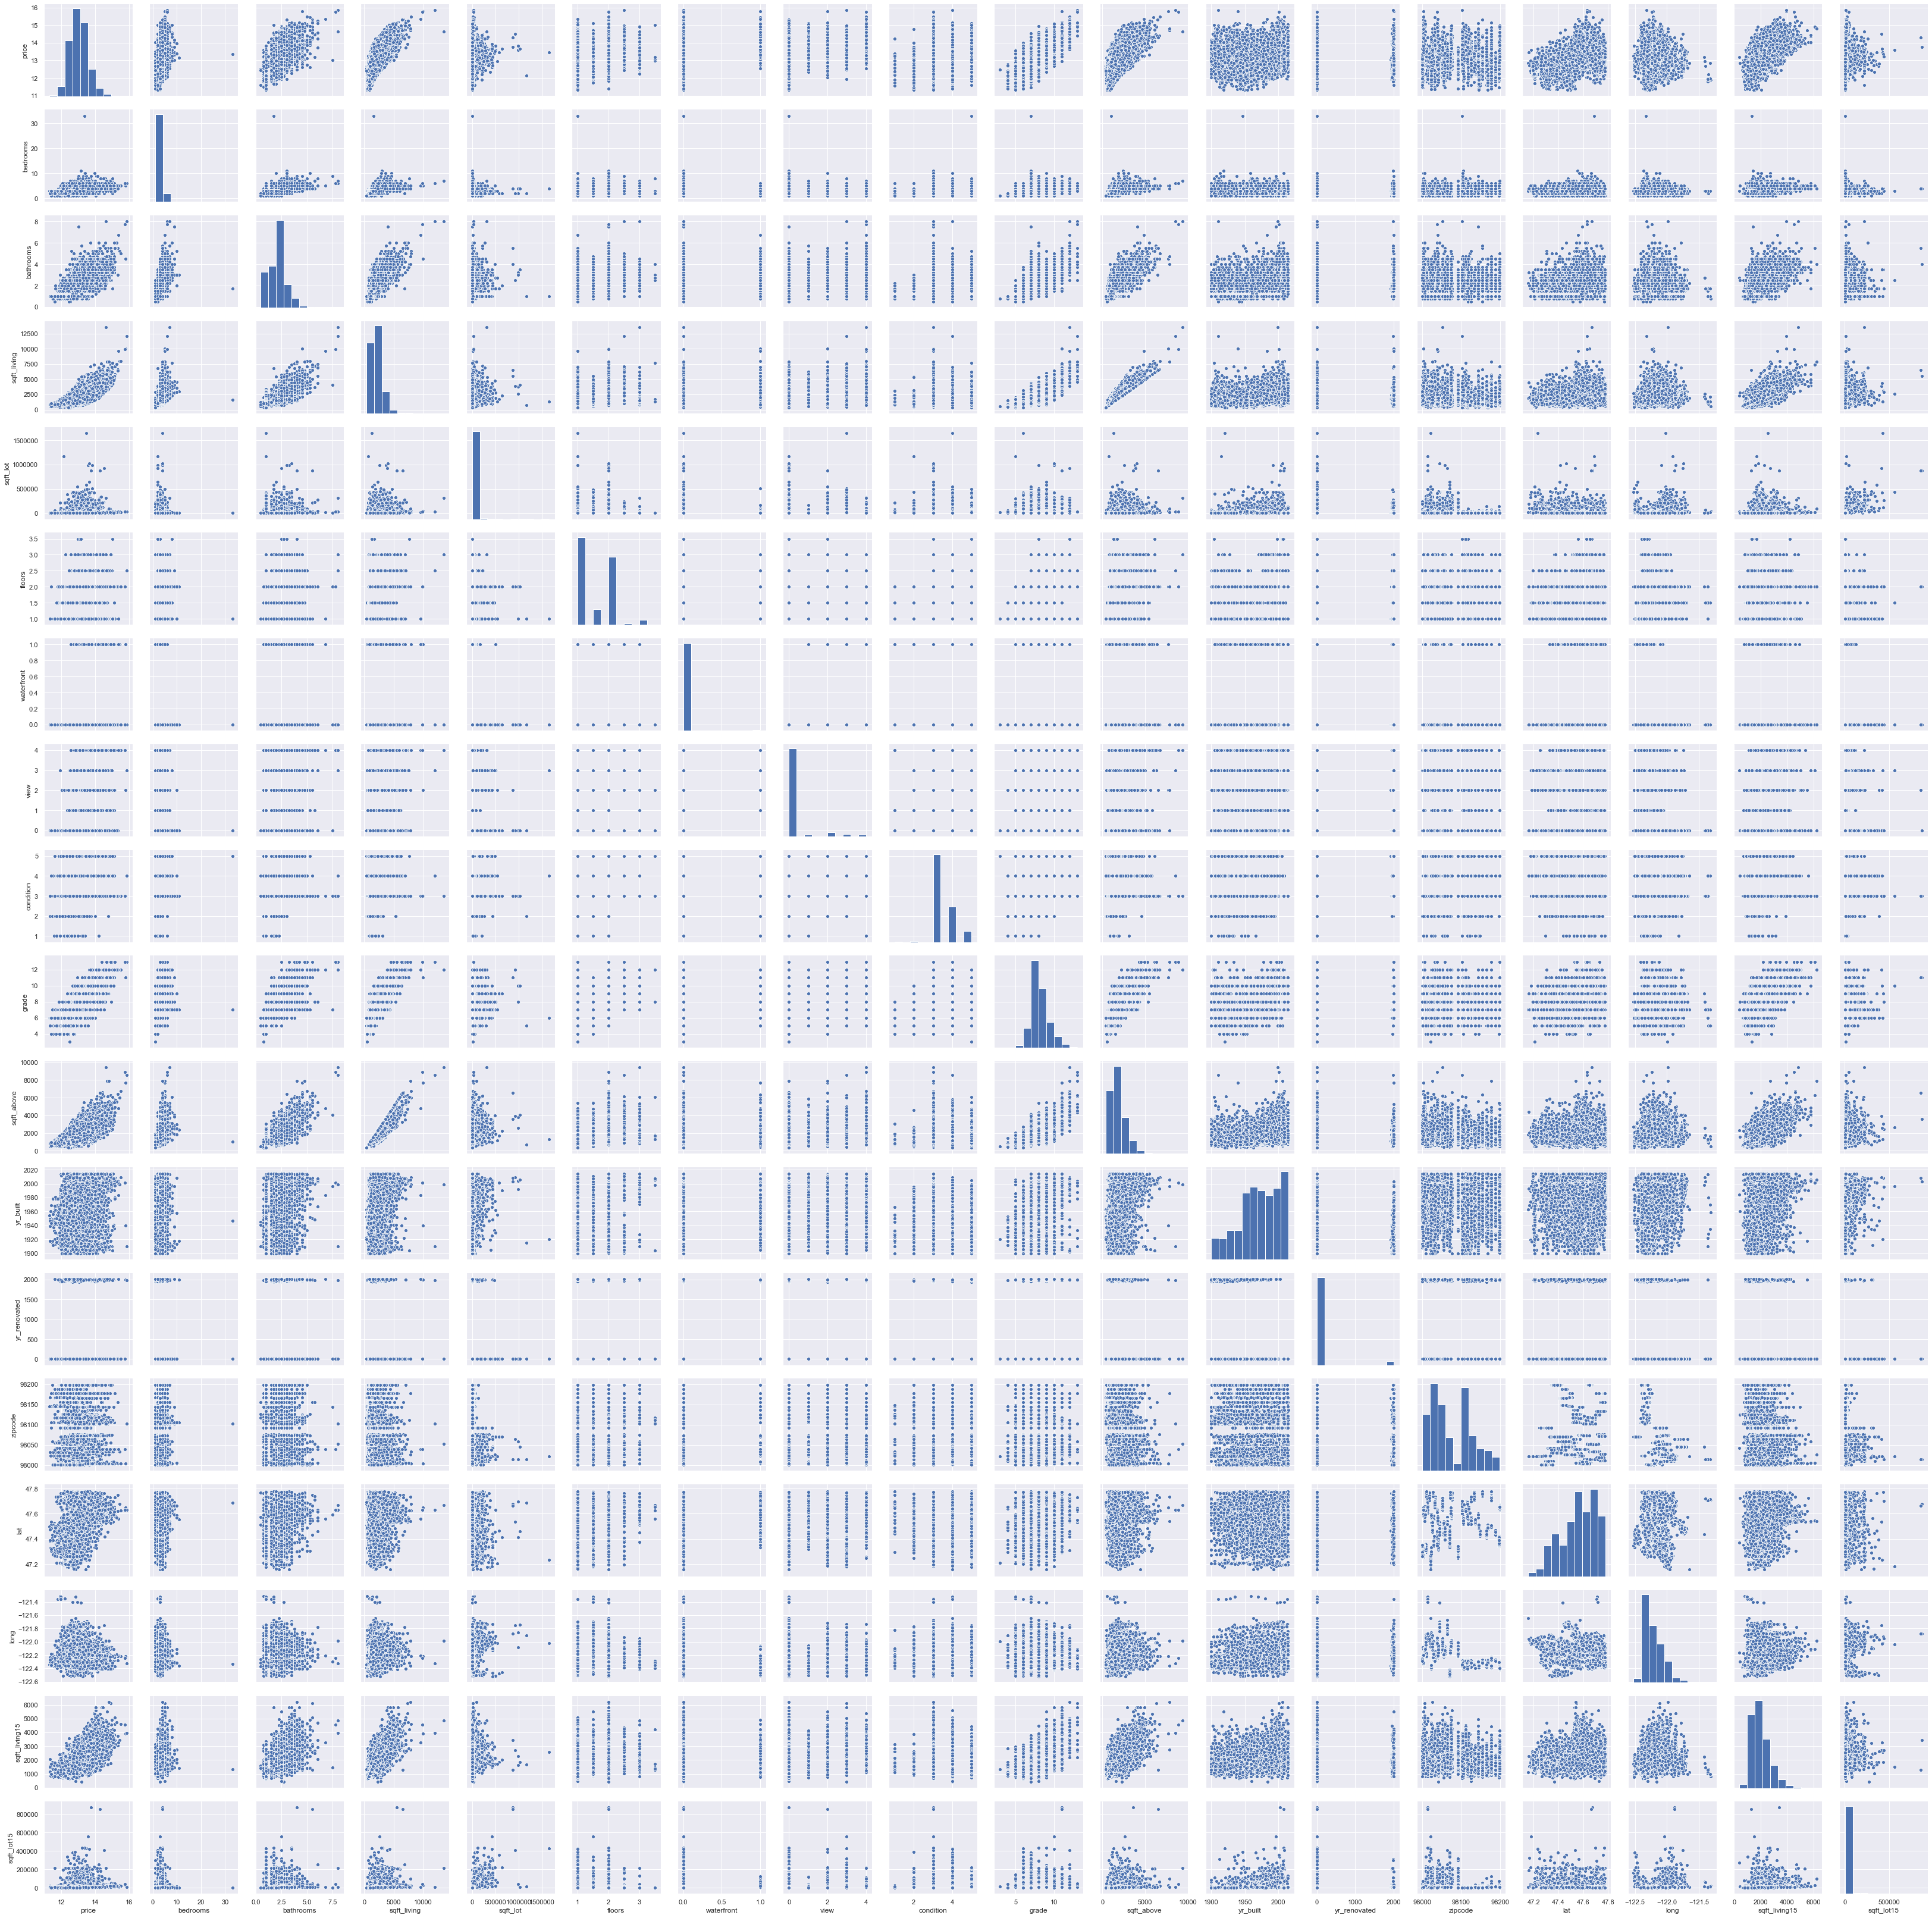

In [22]:
kc_housing_corr = kc_housing.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(kc_housing_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.pairplot(kc_housing)
plt.show()

In [23]:
corr = kc_housing.corr()
print(corr['price'].sort_values(ascending=False))

price            1.000000
grade            0.703114
sqft_living      0.698297
sqft_living15    0.618808
sqft_above       0.607198
bathrooms        0.551221
lat              0.452642
view             0.347364
bedrooms         0.341634
floors           0.314746
waterfront       0.178335
yr_renovated     0.112335
sqft_lot         0.095583
sqft_lot15       0.089665
yr_built         0.077629
long             0.053112
condition        0.034761
zipcode         -0.034844
Name: price, dtype: float64
